In [95]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
from time import sleep
import matplotlib.pyplot as plt
import warnings

#그래프 한글 오류 해결
from matplotlib import font_manager, rc

warnings.filterwarnings("ignore")
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [13]:
df = pd.read_excel('excel/시도별_전출입_인구수.xlsx')
df = df.drop(0)
df['전출지별'] = df['전출지별'].ffill()
#NaN(Not a Number, 결측지) : 측정되지 않은 데이터

df = df.rename({'전출지별':'전출지','전입지별':'전입지'}, axis = 1)
df

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,350213,351424,328228,321182,321158,312419,347248,304761,265354,296291
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,452297,473223,441646,409465,433639,420014,444556,433137,395140,424127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전북특별자치도,139,202,141,210,219,415,392,408,...,609,683,733,768,902,1032,1007,986,878,975
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,928,1062,1127,1102,1254,1302,1466,1326,1194,1109
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,728,903,931,994,1146,1229,1181,1261,1177,1161
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1223,1500,1448,1501,1780,1825,1861,1947,1798,1783


In [14]:
#(수작업)인덱싱으로 처리
df2 = df.iloc[18:35]
df2 = df2.drop(20, axis = 'index')
df2 = df2.drop('전출지', axis = 1)
df2 = df2.set_index('전입지')


In [16]:
mask = ((df['전출지'] == '서울특별시') & (df['전입지'] != '서울특별시')).values  #무엇을 뽑기위해
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지', axis = 'columns')
df_seoul = df_seoul.set_index('전입지')
df_seoul.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289


In [17]:
sr1 = df_seoul.loc['경기도']
print('인덱스:',sr1.index[:5])
print('값들:')
sr1.values

인덱스: Index(['1970', '1971', '1972', '1973', '1974'], dtype='object')
값들:


array([130149, 150313, 93333, 143234, 149045, 253705, 202276, 207722,
       237684, 278411, 297539, 252073, 320174, 400875, 352238, 390265,
       412535, 405220, 415174, 412933, 473889, 384714, 428344, 502584,
       542204, 599411, 520566, 495454, 407050, 471841, 435573, 499575,
       516765, 457656, 400206, 414621, 449632, 431637, 412408, 398282,
       410735, 373771, 354135, 340801, 332785, 359337, 370760, 342433,
       368536, 334293, 375867, 362116, 279731, 279375], dtype=object)

In [18]:
sr1 = sr1.astype(int)
sr1.values

array([130149, 150313,  93333, 143234, 149045, 253705, 202276, 207722,
       237684, 278411, 297539, 252073, 320174, 400875, 352238, 390265,
       412535, 405220, 415174, 412933, 473889, 384714, 428344, 502584,
       542204, 599411, 520566, 495454, 407050, 471841, 435573, 499575,
       516765, 457656, 400206, 414621, 449632, 431637, 412408, 398282,
       410735, 373771, 354135, 340801, 332785, 359337, 370760, 342433,
       368536, 334293, 375867, 362116, 279731, 279375])

## 1개의 그래프 그리기

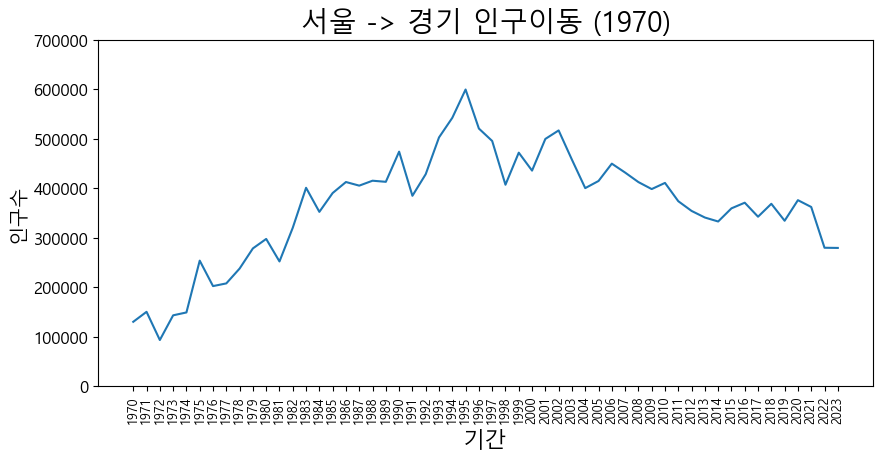

In [39]:
plt.figure(figsize = (10,4.5))


#pyplot.plot(시리즈)         : 선그래프 생성. index가 X축, values가 데이터
#pyplot.plot (x축,데이터)    : default
plt.plot(sr1.index, sr1.values)
#
plt.xticks(rotation = 90, size = 9)
plt.yticks(size = 12)
plt.ylim(0,700000)
plt.xlabel('기간', size=16)
plt.ylabel('인구수', size = 14)
plt.title('서울 -> 경기 인구이동 (1970)', size = 20)

#
#plt.show()
plt.savefig('결과.pdf')

## 1개의 모형(figure)에 두개 이상의 그래프(subplot) 그리기

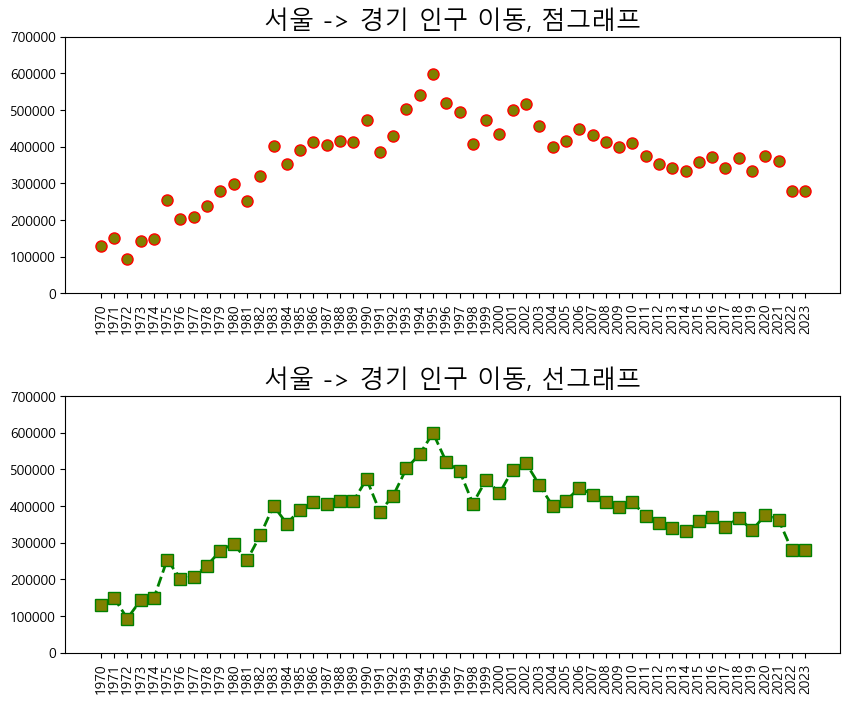

In [65]:
figure = plt.figure(figsize=(10,8))

#
ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)

#
ax1.plot(sr1,'o',color = 'red', markersize=8, markerfacecolor = 'olive')
ax2.plot(sr1, ls = '--', linewidth = 2, color = 'green', marker = 's',
        markersize=8, markerfacecolor = 'olive')

#
figure.subplots_adjust(hspace = 0.4) #좌우는 wspace
ax1.set_title('서울 -> 경기 인구 이동, 점그래프', size = 18)
ax1.set_ylim(0,700000)
ax1.set_xticklabels(sr1.index, rotation=90)
ax2.set_title('서울 -> 경기 인구 이동, 선그래프', size = 18)
ax2.set_ylim(0,700000)
ax2.set_xticklabels(sr1.index, rotation=90)

#
plt.show()

In [70]:
df4 = df_seoul.loc[['충청남도','경상북도','강원특별자치도','전라남도'], '1980':]
df4.rename({'강원특별자치도':'강원도'}, inplace = True)
df4

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


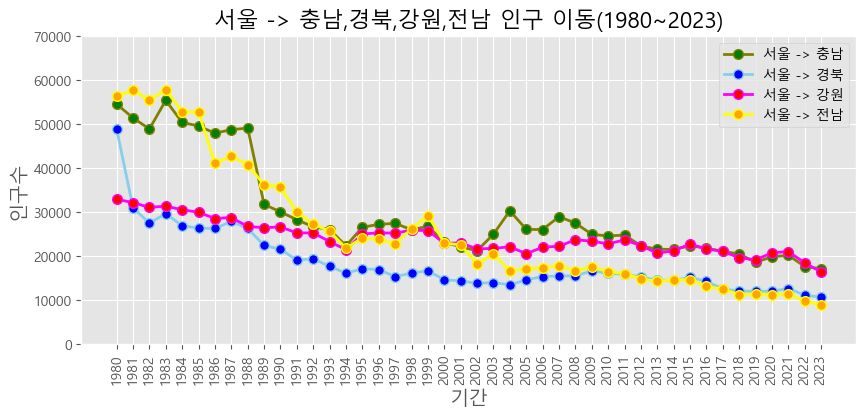

In [114]:
idx_list = ['충청남도','경상북도','강원도','전라남도']
color_list =['green','blue','red','orange']
face_list = ['olive','skyblue','magenta','yellow']
label_list = ['충남','경북','강원','전남']

plt.style.use('ggplot')

figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(1,1,1)


ax.plot(df4.loc['충청남도'], marker ='o',markerfacecolor='green',markersize=7, 
        color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(df4.loc['경상북도'], marker='o',markerfacecolor='blue',markersize=7, 
        color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(df4.loc['강원도'],   marker='o',markerfacecolor='red',markersize=7, 
        color='magenta', linewidth=2, label='서울 -> 강원')
ax.plot(df4.loc['전라남도'], marker='o',markerfacecolor='orange',markersize=7, 
        color='yellow', linewidth=2, label='서울 -> 전남')




ax.legend(loc='best') #속성에 labels = ['','','','']를 넣어 나열한 순서대로 label이 입혀진다.
ax.set_ylim(0, 70000)
ax.set_xlabel('기간', size = 14)
ax.set_ylabel('인구수', size = 14)
ax.set_xticklabels(df4.columns, rotation = 90)
ax.set_title('서울 -> 충남,경북,강원,전남 인구 이동(1980~2023)', size = 16)

plt.show()

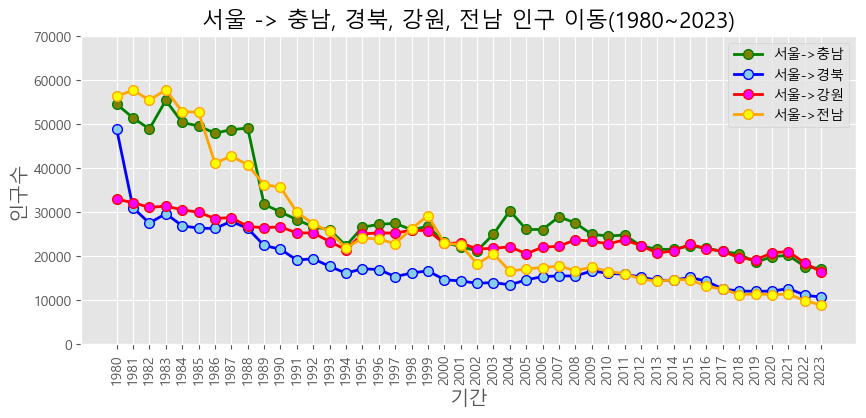

In [119]:
idx_list = ['충청남도','경상북도','강원도','전라남도']
color_list =['green','blue','red','orange']
face_list = ['olive','skyblue','magenta','yellow']
label_list = ['충남','경북','강원','전남']

plt.style.use('ggplot')

figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(1,1,1)


for idx, color, face, label in zip(idx_list,color_list,face_list,label_list):
    ax.plot(df4.loc[idx], marker ='o',markerfacecolor= face, markersize=7, 
        color= color, linewidth=2, label= f'서울->{label}')

    





ax.legend(loc='best') #속성에 labels = ['','','','']를 넣어 나열한 순서대로 label이 입혀진다.
ax.set_ylim(0, 70000)
ax.set_xlabel('기간', size = 14)
ax.set_ylabel('인구수', size = 14)
ax.set_xticklabels(df4.columns, rotation = 90)
title = ', '.join(label_list)
ax.set_title(f'서울 -> {title} 인구 이동(1980~2023)', size = 16)

plt.show()

# for문 응용 : 여러 개의 리스트에 인덱스 각각으로 묶어서<br>여러개의 리스트를 하나의 리스트로 만들기

In [104]:
numbers = [1,2,3,4,5]
friends = ['민수','진철','미영','수진','수형']
colors = ['white','black','green','red','blue']

total = []

for i in range(0,len(numbers)):
    total.append([numbers[i],friends[i],colors[i]])
    
print(total)

list( zip(numbers, friends, colors) )

[[1, '민수', 'white'], [2, '진철', 'black'], [3, '미영', 'green'], [4, '수진', 'red'], [5, '수형', 'blue']]


TypeError: 'list' object is not callable

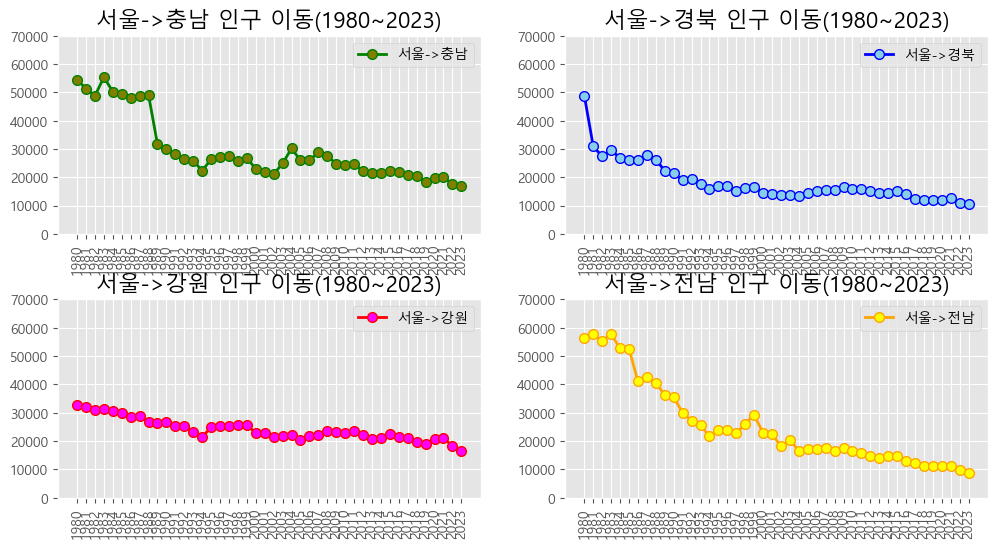

<Axes: title={'center': '서울->전남 인구 이동(1980~2023)'}>

In [147]:
idx_list = ['충청남도','경상북도','강원도','전라남도']
color_list =['green','blue','red','orange']
face_list = ['olive','skyblue','magenta','yellow']
label_list = ['충남','경북','강원','전남']

figure = plt.figure(figsize = (12, 6))


ax_list = []

#변수 하나씩 만들기
for n in range(1,5):
    ax = figure.add_subplot(2,2,n)
    ax_list.append(ax)
    
figure.subplots_adjust(hspace = 0.33)

#ax1 처럼 굳이 변수선언하지않고 값 리스트에 일일히 대응
for ax, idx, color, face, label in zip(ax_list, idx_list, color_list, face_list, label_list):
    ax.plot(df4.loc[idx], marker = 'o', linewidth = 2, markersize = 7, color = color, markerfacecolor = face, label = f'서울->{label}')
    ax.set_ylim(0,70000)
    ax.legend(loc = 'best')
    ax.set_xticklabels(df4.columns, rotation = 90)
    title = f'서울->{label} 인구 이동(1980~2023)'
    ax.set_title(title, size = 16)
    
plt.show()



"""ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,2)
ax3 = figure.add_subplot(2,2,3)
ax4 = figure.add_subplot(2,2,4)
    
    

ax1.plot(df4.loc['충청남도'])
ax2.plot(df4.loc['경상북도'])
ax3.plot(df4.loc['강원도'])
ax4.plot(df4.loc['전라남도'])

ax1.plot(df4.loc['충청남도'], marker ='o',markerfacecolor='green',markersize=7, 
        color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(df4.loc['경상북도'], marker='o',markerfacecolor='blue',markersize=7, 
        color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(df4.loc['강원도'],   marker='o',markerfacecolor='red',markersize=7, 
        color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(df4.loc['전라남도'], marker='o',markerfacecolor='orange',markersize=7, 
        color='yellow', linewidth=2, label='서울 -> 전남')

ax1.set_ylim(0, 70000)
ax2.set_ylim(0, 70000)
ax3.set_ylim(0, 70000)
ax4.set_ylim(0, 70000)

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

ax1.set_xticklabels(df4.columns, rotation = 90)
ax2.set_xticklabels(df4.columns, rotation = 90)
ax3.set_xticklabels(df4.columns, rotation = 90)
ax4.set_xticklabels(df4.columns, rotation = 90)"""


In [143]:
for i in range(1,6):
    globals()['ax'+str(i)] = figure.add_subplot(2,2,i)

AttributeError: 'int' object has no attribute 'figure'

In [136]:
score1 = int(input('점수1 입력: '))
score2 = int(input('점수2 입력: '))
score3 = int(input('점수3 입력: '))
score4 = int(input('점수4 입력: '))
score5 = int(input('점수5 입력: '))


for i in scores:    
    print(f'점수{a} 입력: {i}')
    a = a + 1

점수1 입력: 56,


ValueError: invalid literal for int() with base 10: '56,'

In [137]:
scores = [score1, score2, score3, score4, score5]
a = 1
for i in scores:    
    print(f'점수{a} 입력: {i}')
    a = a + 1

점수1 입력: 89
점수2 입력: 89
점수3 입력: 546
점수4 입력: 78
점수5 입력: 23


In [157]:
df5 = df_seoul.loc[['충청남도','경상북도','강원특별자치도','전라남도'], '2013':]
df5.rename({'강원특별자치도':'강원도'}, inplace = True)
df5.columns = df5.columns.map(int)
df5

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,
충청남도,21486,21473,22299,21741,21020,20426,18522,19814,20129,17573,17060
경상북도,14420,14456,15113,14236,12464,12017,11935,11987,12568,11095,10607
강원도,20601,21173,22659,21590,21016,19558,19105,20701,20974,18374,16340
전라남도,14187,14591,14598,13065,12426,11209,11334,11210,11305,9839,8828


[Text(2012.0, 0, '2013'),
 Text(2014.0, 0, '2014'),
 Text(2016.0, 0, '2015'),
 Text(2018.0, 0, '2016'),
 Text(2020.0, 0, '2017'),
 Text(2022.0, 0, '2018'),
 Text(2024.0, 0, '2019')]

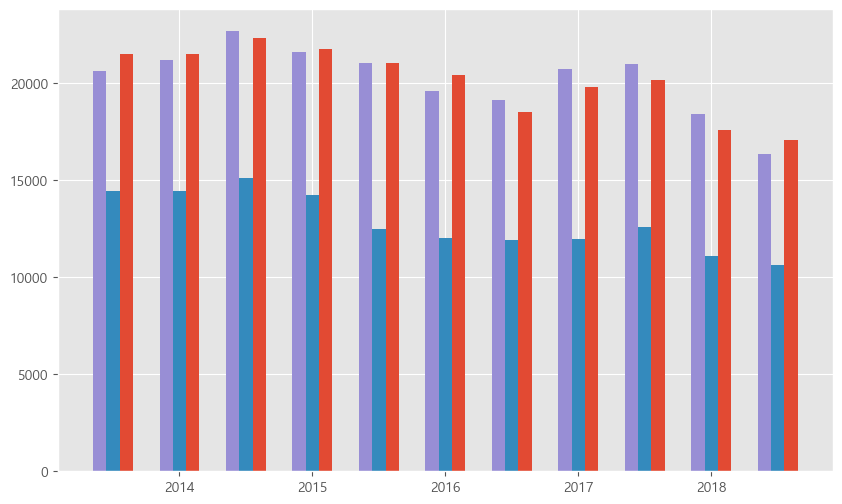

In [164]:
idx_list = ['충청남도','경상북도','강원특별자치도','전라남도']
sr1 = df5.loc['충청남도']
sr2 = df5.loc['경상북도']
sr3 = df5.loc['강원도']

figure = plt.figure(figsize = (10,6))
ax = figure.add_subplot(1,1,1)
ax.bar(height = sr1.values, x = sr1.index + 0.2, width = 0.2)
ax.bar(height = sr2.values, x = sr2.index + 0.0, width = 0.2)
ax.bar(height = sr3.values, x = sr2.index - 0.2, width = 0.2)

axis_x = [str(year) for year in range(2013,2024)]

ax.set_xticklabels(axis_x)

In [162]:
years = []
for year in range(2013,2024):
    years.append(str(year))
print(years)
#map(str,range(2013,2024))   :위와 같다
#[str(year) for year in range(2013,2024)]   :위와 같다

['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


<function matplotlib.pyplot.show(close=None, block=None)>

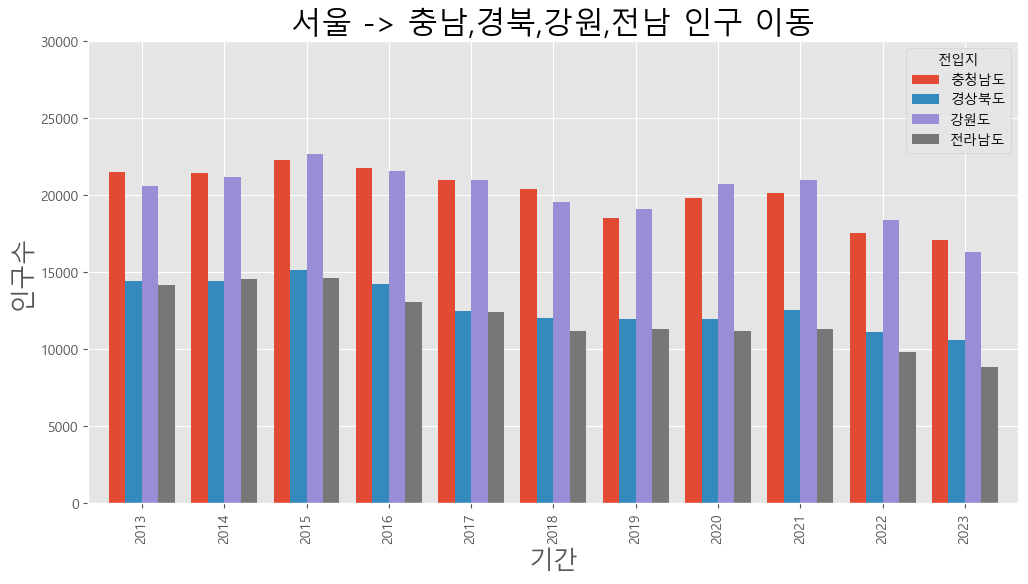

In [171]:
#판다스 내장 막대 그래프

#판다스 객체 선언하고 이름짓기 판다스 내장 matplot의 함수 사용
ax = df5.T.plot(kind = 'bar', figsize = (12,6), width = 0.8)
ax.set_title('서울 -> 충남,경북,강원,전남 인구 이동', size=22)
ax.set_ylim(0, 30000)
ax.set_xlabel('기간', size = 18)
ax.set_ylabel('인구수', size = 18)
plt.show

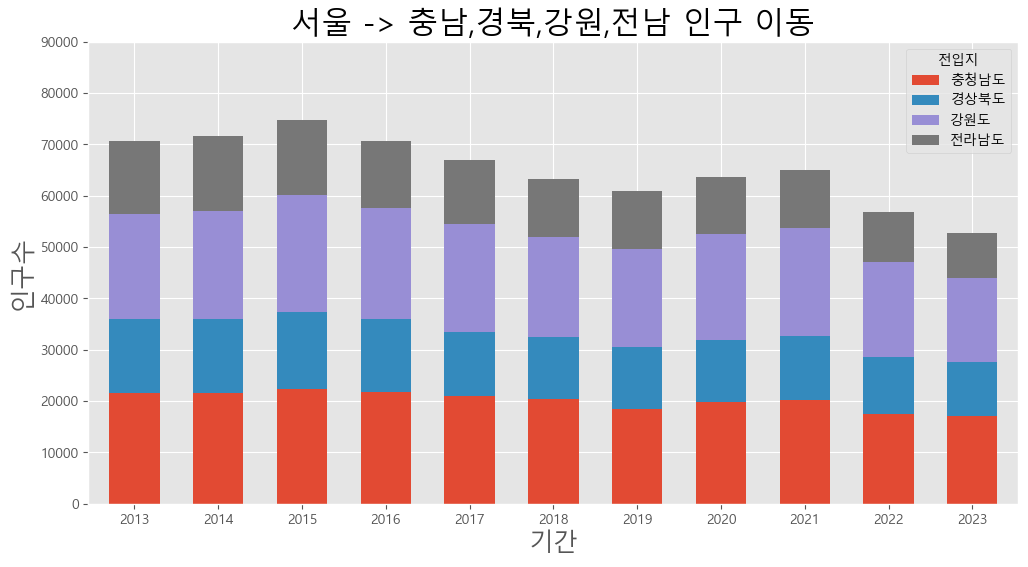

In [184]:
#쌓아올리는 형식
ax = df5.T.plot(kind = 'bar', figsize = (12,6), width = 0.6, stacked = True)

ax.set_title('서울 -> 충남,경북,강원,전남 인구 이동', size=22)
ax.set_ylim(0, 90000)
ax.set_xlabel('기간', size = 18)
ax.set_ylabel('인구수', size = 18)

years = [str(year) for year in range(2013,2024)] #x라벨들을 직접 만들어줘야함
ax.set_xticklabels(years,rotation = 0) #만든 x라벨을 0도로 맞춰줌

plt.show()

"Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64')"